In [3]:
# Python Script to Extract tweets of a 
# particular Hashtag using Tweepy and Pandas

# import modules
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import datetime
import tweepy
import json
import pandas as pd
import csv
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sasha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
    print()
    print(f"Tweet {n}:")
    print(f"Username:{ith_tweet[0]}")
    print(f"Description:{ith_tweet[1]}")
    print(f"Location:{ith_tweet[2]}")
    print(f"Following Count:{ith_tweet[3]}")
    print(f"Follower Count:{ith_tweet[4]}")
    print(f"Total Tweets:{ith_tweet[5]}")
    print(f"Retweet Count:{ith_tweet[6]}")
    print(f"Tweet Text:{ith_tweet[7]}")
    print(f"Hashtags Used:{ith_tweet[8]}")
    print(f"Date:{ith_tweet[9]}")

In [5]:
#importer dansk som sprog
#pip install afinn
from afinn import Afinn
afinn = Afinn(language='da')

In [ ]:
# function to perform data extraction
def scrape(words, date_since, numtweet):
      
    # Creating DataFrame using pandas
    db = pd.DataFrame(columns=['username', 'description', 'location', 'following',
                               'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags', 'date'])
      
    # We are using .Cursor() to search through twitter for the required tweets.
    # The number of tweets can be restricted using .items(number of tweets)
    tweets = tweepy.Cursor(api.search, q=words, lang="da",
                           since=date_since, tweet_mode='extended').items(numtweet)
     
    # .Cursor() returns an iterable object. Each item in 
    # the iterator has various attributes that you can access to 
    # get information about each tweet
    list_tweets = [tweet for tweet in tweets]
      
    # Counter to maintain Tweet Count
    i = 1  
      
    # we will iterate over each tweet in the list for extracting information about each tweet
    for tweet in list_tweets:
        username = tweet.user.screen_name
        description = tweet.user.description
        location = tweet.user.location
        following = tweet.user.friends_count
        followers = tweet.user.followers_count
        totaltweets = tweet.user.statuses_count
        retweetcount = tweet.retweet_count
        hashtags = tweet.entities['hashtags']
        date = tweet.created_at
          
        # Retweets can be distinguished by a retweeted_status attribute,
        # in case it is an invalid reference, except block will be executed
        try:
            text = tweet.retweeted_status.full_text
        except AttributeError:
            text = tweet.full_text
        hashtext = list()
        for j in range(0, len(hashtags)):
            hashtext.append(hashtags[j]['text'])
          
        # Here we are appending all the extracted information in the DataFrame
        ith_tweet = [username, description, location, following,
                     followers, totaltweets, retweetcount, text, hashtext, date]
        db.loc[len(db)] = ith_tweet
        
          
        # Function call to print tweet data on screen
        printtweetdata(i, ith_tweet)
        i = i+1
    filename = 'df3.csv'
    
    #filename df1= COVID19 Covid19dk coronadk
    #filename df2= (dkpol:Covid19dk) OR (dkpol:coronadk) OR (dkpol:COVID19)
    #filename df3= (dkmedier:Covid19dk) OR (dkmedier:coronadk) OR (dkmedier:COVID19)
      
    # we will save our database as a CSV file.
    db.to_csv(filename)
  
  
if __name__ == '__main__':
      
    # Enter your own credentials obtained 
    # from your developer account
    consumer_key = "5Lc4sTEI4Iu76e5NTUPonfiqA"
    consumer_secret = "VxE3SEPYgIGzvj3t3XEe77vNcpYAeOMKm3QpOfqa4ZO7y5tkEi"
    access_key = "1183298126523838464-AmxGW3Jn6Frrff281wewWSB386sEQ0"
    access_secret = "P36t9VcCYCWgn0QIdotXe2R4tbOz3rSeSHpuz0s5NkNz2"
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
      
    # Enter Hashtag and initial date
    print("Enter Twitter HashTag to search for")
    words = input()
    print("Enter Date since The Tweets are required in yyyy-mm--dd")
    date_since = input()
      
    # number of tweets you want to extract in one run
    numtweet = 10000
    scrape(words, date_since, numtweet)
    print('Scraping has completed!')

### Combining dataframes

In [6]:
df1=pd.read_csv('C:/Users/sasha/OneDrive/Uni/Stud.polit/7. Semester/Social Data Science/Eksamen/df1.csv')
df2=pd.read_csv('C:/Users/sasha/OneDrive/Uni/Stud.polit/7. Semester/Social Data Science/Eksamen/df2.csv')
df3=pd.read_csv('C:/Users/sasha/OneDrive/Uni/Stud.polit/7. Semester/Social Data Science/Eksamen/df3.csv')

obs = [df1, df2, df3]

data_set = pd.concat(obs)
data_set = data_set.reset_index(drop = True)
data_set

,Unnamed: 0,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,date
0,0,SupAyaLaya,NaN,NaN,1228,521,34115,1,"Beder alle indberette dette tweet, da det tyde...",[],2021-08-16 23:59:33
1,1,Mullarrd,"Nearsighted scrap pile, perpetual lefty. Searc...",Pangaea,515,536,39951,17,Få din vaccination uden tidsbestilling. Der er...,[],2021-08-16 21:14:11
2,2,GitteKJP,"Søger viden, nyheder og indsigter til eftertanke.",København,972,947,231239,17,Få din vaccination uden tidsbestilling. Der er...,[],2021-08-16 16:41:45
3,3,idamariehansen7,NaN,Nykøbing Sjælland,1292,346,21549,17,Få din vaccination uden tidsbestilling. Der er...,[],2021-08-16 16:07:07
4,4,ThomasHeie,Fængselsbetjent - FREM'er - Fotograf - FDFer,"København, Danmark",111,269,21567,0,Indsatsen i Afghanistan har kostet Danmark 15 ...,"['dkpol', 'COVID19dk']",2021-08-16 15:48:37
...,...,...,...,...,...,...,...,...,...,...,...
1731,26,KlausKblog,"Klaus K, journalist & sangskriver i Danser med...",København,511,2464,33254,28,Israels massevaccination: \n25% stigning i hje...,[],2021-08-11 18:48:21
1732,27,HettingClaus,"""Three things remain not long hidden: The Sun,...",Denmark,2249,2717,15616,28,Israels massevaccination: \n25% stigning i hje...,[],2021-08-11 17:59:14
1733,28,nbm_1981,IT Automation Consultant (MCAAA/MCSA/MCP). Lik...,"København, Danmark",612,624,12430,28,Israels massevaccination: \n25% stigning i hje...,"['dkpol', 'dkmedier', 'coronadk', 'covid19dk',...",2021-08-11 17:50:59
1734,29,transceiverfreq,xi=aixi'-(d+ai0+ai1)xi+rxi(fi-Φ ) | Freelance ...,"Frederiksberg, Denmark",339,1089,44893,0,@DRNyheder @tv2newsdk @moderna_tx @pfizer Jeg ...,"['dkpol', 'dkmedier', 'COVID19']",2021-08-10 19:29:12


### Cleaning the DataFrame

In [ ]:
#https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

In [7]:
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
         "]+", flags=re.UNICODE)

In [8]:
#Dropping collumns
data_set1 = data_set.drop(['Unnamed: 0','username', 'description', 'followers', 'following'], axis=1).reset_index(drop = True)

#Creating collumn for hashtags
data_set1['hashtags'] = data_set1['text'].apply(lambda x: re.findall(r'#(\w+)', x))

#Calling text column
tweets = data_set1['text'].values

In [9]:
import numpy as np
wnl = nltk.WordNetLemmatizer()

def clean_tweet(tweet):
    if type(tweet) == np.float64:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) 
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('[.,*?:]',' ', temp)
    temp = re.sub('\v', ' ', temp)
    temp = re.sub("[\\n]",' ', temp)
    temp = re.sub('1/n',' ', temp)
    temp = re.sub('2/n',' ', temp)
    temp = re.sub('3/n',' ', temp)
    temp = re.sub('4/n',' ', temp)
    temp = re.sub('5/n',' ', temp)
    temp = re.sub('6/n',' ', temp)
    temp = re.sub('7/n',' ', temp)
    temp = re.sub('8/n',' ', temp)
    temp = re.sub('-','', temp) 
    temp = re.sub('%','', temp) 
    temp = re.sub('["]','', temp)
    temp = re.sub("[']","", temp)
    temp = re.sub('[0-9]', ' ', temp)
    temp = re.sub('\+', ' ', temp)
   
    temp = emoji_pattern.sub(r'', temp)
    return temp

In [10]:
clean_data = [clean_tweet(tweets) for tweets in tweets]

c = str(clean_data) #converting the clean_data from a list to a string
a = c.replace("'", "")
b = a.replace(",", "")

In [11]:
#Remove danish stopWords
stopWords = set(stopwords.words('danish'))
sent_sw_removed = [i for i in nltk.word_tokenize(b.lower()) if i not in stopWords]

# Counter

In [12]:
from collections import Counter

tæl = Counter(sent_sw_removed).most_common()

In [13]:
counter_tabel=pd.DataFrame(tæl)
counter_tabel.columns = ['Ord', 'Antal']

counter_tabel

,Ord,Antal
0,covid,351
1,kan,306
2,så,224
3,vaccination,200
4,få,177
...,...,...
3902,wto,1
3903,tilsidesætt,1
3904,patenterne,1
3905,medicinalindustrien,1


# Sentiment Analysis

In [14]:
tweetser = [None for i in range(len(data_set1))]

score = [None for i in range(len(data_set1))]
for i in range(len(data_set1)):  
    tweetser[i] = clean_tweet(data_set1.text.values[i])
    score[i]= afinn.score(tweetser[i])
    
#count reetweets
#Counter(tweetser).most_common()

In [15]:
data_set1['Clean Text'] = tweetser
data_set1['Sentiment'] = score
final_set = data_set1.drop(['text'], axis=1).reset_index(drop = True)
final_set

,location,totaltweets,retweetcount,hashtags,date,Clean Text,Sentiment
0,NaN,34115,1,"[coronadk, dkmedier, dkpol, covid19dk]",2021-08-16 23:59:33,beder alle indberette dette tweet da det tyde...,-1.0
1,Pangaea,39951,17,"[Bornholm, sundpol, dkpol, COVID19dk]",2021-08-16 21:14:11,få din vaccination uden tidsbestilling der er...,0.0
2,København,231239,17,"[Bornholm, sundpol, dkpol, COVID19dk]",2021-08-16 16:41:45,få din vaccination uden tidsbestilling der er...,0.0
3,Nykøbing Sjælland,21549,17,"[Bornholm, sundpol, dkpol, COVID19dk]",2021-08-16 16:07:07,få din vaccination uden tidsbestilling der er...,0.0
4,"København, Danmark",21567,0,"[dkpol, COVID19dk]",2021-08-16 15:48:37,indsatsen i afghanistan har kostet danmark ...,0.0
...,...,...,...,...,...,...,...
1731,København,33254,28,"[dkpol, dkmedier, coronadk, covid19dk, sundpol...",2021-08-11 18:48:21,israels massevaccination stigning i hjert...,0.0
1732,Denmark,15616,28,"[dkpol, dkmedier, coronadk, covid19dk, sundpol...",2021-08-11 17:59:14,israels massevaccination stigning i hjert...,0.0
1733,"København, Danmark",12430,28,"[dkpol, dkmedier, coronadk, covid19dk, sundpol...",2021-08-11 17:50:59,israels massevaccination stigning i hjert...,0.0
1734,"Frederiksberg, Denmark",44893,0,"[dkpol, dkmedier, COVID19]",2021-08-10 19:29:12,jeg kan på det varmeste anbefale at læse ...,2.0


# Bar chart for final_set

In [16]:
#def. kolonner til graf
def Sentiment_neg (row):
   if row['Sentiment'] == -1 :
      return '-1'
   if row['Sentiment'] == -2 :
      return '-2'
   if row['Sentiment'] == -3 :
      return '-3'
   if row['Sentiment'] == -4 :
      return '-4'
   if row['Sentiment'] == -5 :
      return '-5'
   if row['Sentiment'] == -6 :
      return '-6'
   if row['Sentiment'] == -7 :
      return '-7'
   if row['Sentiment'] == -8 :
      return '-8'
   if row['Sentiment'] == -9 :
      return '-9'
   if row['Sentiment'] == -10 :
      return '-10'
   if row['Sentiment'] == -11 :
      return '-11'
   if row['Sentiment'] == -11 :
      return '-12'
   return np.nan

def Sentiment_pos (row):
   if row['Sentiment'] == 1 :
      return '1'
   if row['Sentiment'] == 2 :
      return '2'
   if row['Sentiment'] == 3 :
      return '3'
   if row['Sentiment'] == 4 :
      return '4'
   if row['Sentiment'] == 5 :
      return '5'
   if row['Sentiment'] == 6 :
      return '6'
   if row['Sentiment'] == 7 :
      return '7'
   if row['Sentiment'] == 8 :
      return '8'
   if row['Sentiment'] == 9 :
      return '1'
   return np.nan
    
def Sentiment_neu (row):    
    if row['Sentiment'] == 0 :
      return '0'
    return np.nan

final_set['Sentiment_neg'] = final_set.apply (lambda row: Sentiment_neg(row), axis=1)
final_set['Sentiment_pos'] = final_set.apply (lambda row: Sentiment_pos(row), axis=1)
final_set['Sentiment_neu'] = final_set.apply (lambda row: Sentiment_neu(row), axis=1)


#tæl rækker
final_set.count()

#indsæt tal fra final_set.count() til at finde gennemsnit
avr_neg=485/1736
avr_neu=695/1736
avr_pos=556/1736

avr_pos

0.32027649769585254

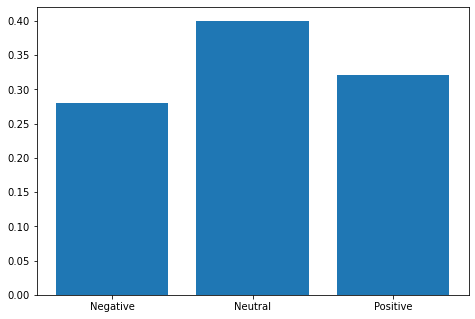

In [17]:
#plot graf
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Negative', 'Neutral', 'Positive']
andel = [0.2793778801843318,0.40034562211981567,0.32027649769585254]
ax.bar(langs,andel)
plt.show()

# Bar chart for dkpol

In [18]:
#nu til dkpol
dkpol=pd.read_csv('C:/Users/sasha/OneDrive/Uni/Stud.polit/7. Semester/Social Data Science/Eksamen/dkpol_final.csv')

In [19]:
dkpol

,location,totaltweets,retweetcount,hashtags,date,Clean Text,Sentiment
0,"Stevns, Danmark",1145,16,['dkpol'],2021-08-19 08:59:20,generation identitær påstod forleden i informa...,0.0
1,⚜️🇩🇰Denmark~Copenhagen Area,32740,0,['dkpol'],2021-08-19 08:58:27,når stat modtager flygtninger bærer den et s...,0.0
2,Danmark,23044,0,['dkpol'],2021-08-19 08:58:05,lige nu er populær på,3.0
3,Denmark,27829,0,['dkpol'],2021-08-19 08:57:39,og kan fortsat ikke blive enige politikern...,-3.0
4,"Aarhus, Danmark",838,9,"['croptop', 'dkmedier', 'dkpol']",2021-08-19 08:57:06,forbud mod croptops = negativ social kontrol ...,-4.0
...,...,...,...,...,...,...,...
1990,Danmark,48175,1,['dkpol'],2021-08-13 18:02:57,dagens tegning klæder skaber folk pernille v...,0.0
1991,Denmark,10848,6,"['dkpol', 'dkkrim']",2021-08-13 18:01:33,har indlæg i jp i dag om mine tanker for krimi...,1.0
1992,Denmark,52137,1,['dkpol'],2021-08-13 18:01:07,dagens tegning klæder skaber folk pernille v...,0.0
1993,"København, Danmark",336,11,"['dkpol', 'dkgreen']",2021-08-13 17:59:04,en svinebonde får kroner for et kilo bulk gr...,0.0


In [20]:
#def. kolonner til graf
def Sentiment_neg_dkpol (row):
   if row['Sentiment'] == -1 :
      return '-1'
   if row['Sentiment'] == -2 :
      return '-2'
   if row['Sentiment'] == -3 :
      return '-3'
   if row['Sentiment'] == -4 :
      return '-4'
   if row['Sentiment'] == -5 :
      return '-5'
   if row['Sentiment'] == -6 :
      return '-6'
   if row['Sentiment'] == -7 :
      return '-7'
   if row['Sentiment'] == -8 :
      return '-8'
   if row['Sentiment'] == -9 :
      return '-9'
   if row['Sentiment'] == -10 :
      return '-10'
   if row['Sentiment'] == -11 :
      return '-11'
   if row['Sentiment'] == -11 :
      return '-12'
   return np.nan

def Sentiment_pos_dkpol (row):
   if row['Sentiment'] == 1 :
      return '1'
   if row['Sentiment'] == 2 :
      return '2'
   if row['Sentiment'] == 3 :
      return '3'
   if row['Sentiment'] == 4 :
      return '4'
   if row['Sentiment'] == 5 :
      return '5'
   if row['Sentiment'] == 6 :
      return '6'
   if row['Sentiment'] == 7 :
      return '7'
   if row['Sentiment'] == 8 :
      return '8'
   if row['Sentiment'] == 9 :
      return '1'
   return np.nan
    
def Sentiment_neu_dkpol (row):    
    if row['Sentiment'] == 0 :
      return '0'
    return np.nan

dkpol['Sentiment_neg_dkpol'] = dkpol.apply (lambda row: Sentiment_neg_dkpol(row), axis=1)
dkpol['Sentiment_pos_dkpol'] = dkpol.apply (lambda row: Sentiment_pos_dkpol(row), axis=1)
dkpol['Sentiment_neu_dkpol'] = dkpol.apply (lambda row: Sentiment_neu_dkpol(row), axis=1)


#tæl rækker
dkpol.count()

#indsæt tal fra dkpol.count() til at finde gennemsnit
avr_neg_dkpol=718/1995
avr_neu_dkpol=542/1995
avr_pos_dkpol=710/1995


avr_pos_dkpol

0.3558897243107769

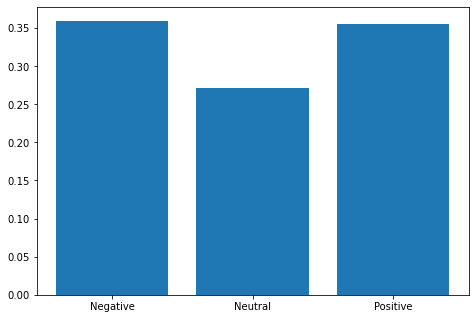

In [21]:
#plot graf for dkpol
figdkpol = plt.figure()
ax = figdkpol.add_axes([0,0,1,1])
langs = ['Negative', 'Neutral', 'Positive']
andel = [0.3598997493734336,0.27167919799498746,0.3558897243107769]
ax.bar(langs,andel)
plt.show()

# Curve for final_set (pos, neg, neu), time series data

In [56]:

final_set['sentiment_type'] = final_set['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
final_set['sentiment_type_count'] = final_set['sentiment_type'].groupby(final_set['Date']).transform('count')
df_sentiment_count = final_set.sentiment_type.value_counts().rename_axis('types').reset_index(name='counts')
df_sentiment_count

,types,counts
0,Neutral,695
1,Positive,556
2,Negative,485


In [60]:
temps = final_set[['sentiment_type', 'Date']]
df_daily_sentiment = temps.groupby(['Date', 'sentiment_type'])['sentiment_type'].count().reset_index(name='counts')
df_daily_sentiment

,Date,sentiment_type,counts
0,2021-08-09,Negative,35
1,2021-08-09,Neutral,40
2,2021-08-09,Positive,73
3,2021-08-10,Negative,50
4,2021-08-10,Neutral,74
5,2021-08-10,Positive,103
6,2021-08-11,Negative,66
7,2021-08-11,Neutral,106
8,2021-08-11,Positive,97
9,2021-08-12,Negative,85


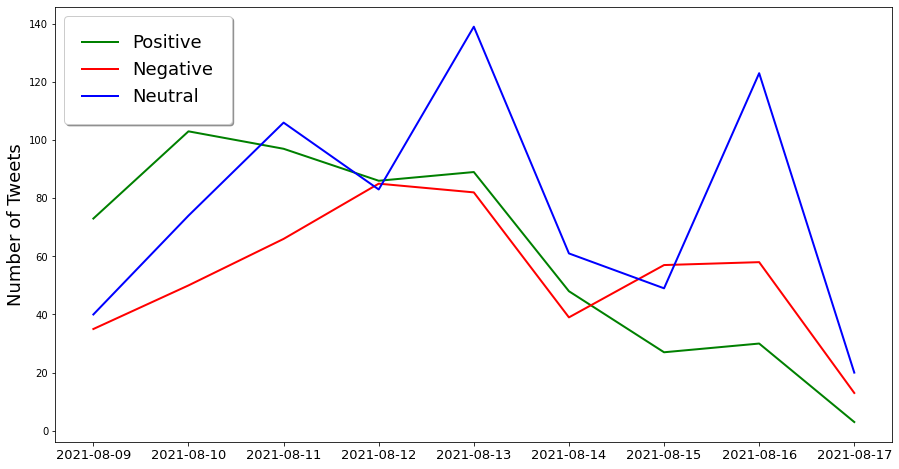

In [113]:
#plotting curve for final_set (positive, negative, neutral) on numbers of Tweets
positive = df_daily_sentiment[df_daily_sentiment['sentiment_type']=='Positive']
negative = df_daily_sentiment[df_daily_sentiment['sentiment_type']=='Negative']
neutral = df_daily_sentiment[df_daily_sentiment['sentiment_type']=='Neutral']

fig, ax = plt.subplots(figsize=(15,8))

plt.plot(positive['Date'], positive['counts'], color='green', linewidth = 2,  label = 'Positive')
plt.plot(negative['Date'], negative['counts'], color='red', linewidth = 2,  label = 'Negative')
plt.plot(neutral['Date'], neutral['counts'], color='blue', linewidth = 2,  label = 'Neutral')
plt.xlabel('', fontsize=18)
plt.ylabel('Number of Tweets', fontsize=18)
plt.title('')
plt.tick_params(axis='x', which='major', labelsize=13)
plt.legend(loc='upper left', fancybox=True, framealpha=1, shadow=True, borderpad=1, fontsize=18)
plt.show()

# Curve - ratio positive final_set/dkpol

In [71]:
rat = df_daily_sentiment.groupby(['Date'])['counts'].transform('sum')
rat

0     148
1     148
2     148
3     227
4     227
5     227
6     269
7     269
8     269
9     254
10    254
11    254
12    310
13    310
14    310
15    148
16    148
17    148
18    133
19    133
20    133
21    211
22    211
23    211
24     36
25     36
26     36
Name: counts, dtype: int64

In [72]:
df_daily_sentiment = df_daily_sentiment.assign(ratio=lambda x: x.counts.div(rat))
df_daily_sentiment

,Date,sentiment_type,counts,ratio
0,2021-08-09,Negative,35,0.236486
1,2021-08-09,Neutral,40,0.270270
2,2021-08-09,Positive,73,0.493243
3,2021-08-10,Negative,50,0.220264
4,2021-08-10,Neutral,74,0.325991
5,2021-08-10,Positive,103,0.453744
6,2021-08-11,Negative,66,0.245353
7,2021-08-11,Neutral,106,0.394052
8,2021-08-11,Positive,97,0.360595
9,2021-08-12,Negative,85,0.334646


In [85]:
total_final_set = df_daily_sentiment.pivot_table('ratio', index='sentiment_type', columns='Date', aggfunc=sum)
total_final_set

Positive_final_set=total_final_set.drop(['Negative', 'Neutral'], axis=0)
Positive_final_set

Date,2021-08-09,2021-08-10,2021-08-11,2021-08-12,2021-08-13,2021-08-14,2021-08-15,2021-08-16,2021-08-17
sentiment_type,,,,,,,,,
Positive,0.493243,0.453744,0.360595,0.338583,0.287097,0.324324,0.203008,0.14218,0.083333


In [101]:
#dkpol ratio positive

dkpol[['Date', 'Time']] = dkpol.date.str.split(expand=True)

dkpol['sentiment_type'] = dkpol['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
dkpol['sentiment_type_count'] = dkpol['sentiment_type'].groupby(final_set['Date']).transform('count')
dkpol_sentiment_count = dkpol.sentiment_type.value_counts().rename_axis('types').reset_index(name='counts')
dkpol_sentiment_count

tempser = dkpol[['sentiment_type', 'Date']]
dkpol_daily_sentiment = tempser.groupby(['Date', 'sentiment_type'])['sentiment_type'].count().reset_index(name='counts')
dkpol_daily_sentiment


dkpol_daily_sentiment = dkpol_daily_sentiment.assign(ratio=lambda x: x.counts.div(rat))
dkpol_daily_sentiment

rat = dkpol_daily_sentiment.groupby(['Date'])['counts'].transform('sum')
rat

dkpol_daily_sentiment = dkpol_daily_sentiment.assign(ratio=lambda x: x.counts.div(rat))
dkpol_daily_sentiment

total_dkpol = dkpol_daily_sentiment.pivot_table('ratio', index='sentiment_type', columns='Date', aggfunc=sum)
total_dkpol

Positive_dkpol=total_dkpol.drop(['Negative', 'Neutral'], axis=0)
Positive_dkpol

Date,2021-08-13,2021-08-14,2021-08-15,2021-08-16,2021-08-17,2021-08-18,2021-08-19
sentiment_type,,,,,,,
Positive,0.414035,0.298246,0.389474,0.238596,0.361404,0.417544,0.42807


In [102]:
total_corona = df_daily_sentiment.pivot_table('ratio', index='Date', columns='sentiment_type', aggfunc=sum)
total_corona

sentiment_type,Negative,Neutral,Positive
Date,,,
2021-08-09,0.236486,0.270270,0.493243
2021-08-10,0.220264,0.325991,0.453744
2021-08-11,0.245353,0.394052,0.360595
2021-08-12,0.334646,0.326772,0.338583
2021-08-13,0.264516,0.448387,0.287097
2021-08-14,0.263514,0.412162,0.324324
2021-08-15,0.428571,0.368421,0.203008
2021-08-16,0.274882,0.582938,0.142180
2021-08-17,0.361111,0.555556,0.083333


In [123]:
total_graf_dkpol = dkpol_daily_sentiment.pivot_table('ratio', index='Date', columns='sentiment_type', aggfunc=sum)
total_graf_dkpol

sentiment_type,Negative,Neutral,Positive
Date,,,
2021-08-13,0.280702,0.305263,0.414035
2021-08-14,0.431579,0.270175,0.298246
2021-08-15,0.445614,0.164912,0.389474
2021-08-16,0.435088,0.326316,0.238596
2021-08-17,0.319298,0.319298,0.361404
2021-08-18,0.333333,0.249123,0.417544
2021-08-19,0.305263,0.266667,0.428070


In [130]:
#merge total_graf_dkpol and total_corona together
result = pd.concat([ total_corona, total_graf_dkpol], axis=1)

result

sentiment_type,Negative,Neutral,Positive,Negative,Neutral,Positive
Date,,,,,,
2021-08-09,0.236486,0.270270,0.493243,NaN,NaN,NaN
2021-08-10,0.220264,0.325991,0.453744,NaN,NaN,NaN
2021-08-11,0.245353,0.394052,0.360595,NaN,NaN,NaN
2021-08-12,0.334646,0.326772,0.338583,NaN,NaN,NaN
2021-08-13,0.264516,0.448387,0.287097,0.280702,0.305263,0.414035
2021-08-14,0.263514,0.412162,0.324324,0.431579,0.270175,0.298246
2021-08-15,0.428571,0.368421,0.203008,0.445614,0.164912,0.389474
2021-08-16,0.274882,0.582938,0.142180,0.435088,0.326316,0.238596
2021-08-17,0.361111,0.555556,0.083333,0.319298,0.319298,0.361404


Text(0, 0.5, 'Ratio of positive')

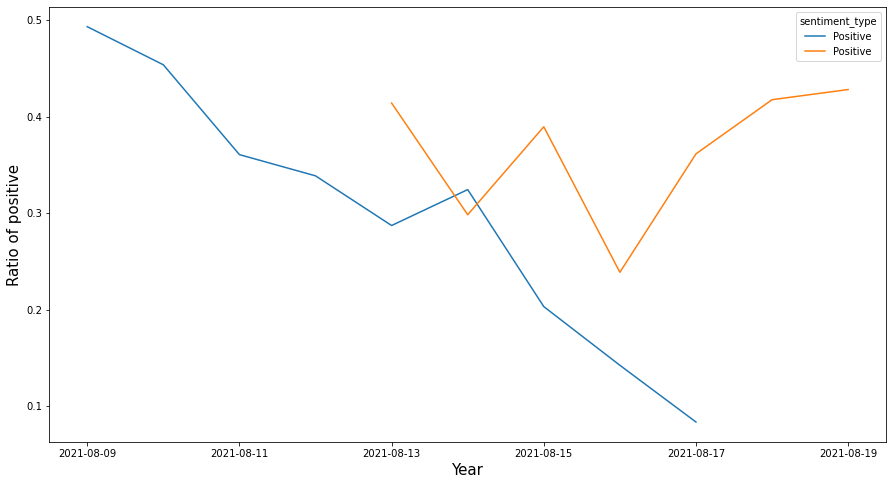

In [132]:
total = result.drop(['Negative', 'Neutral'], axis=1).plot(figsize=(15,8))
plt.xlabel('Year', fontsize=15)
plt.ylabel('Ratio of positive', fontsize=15)